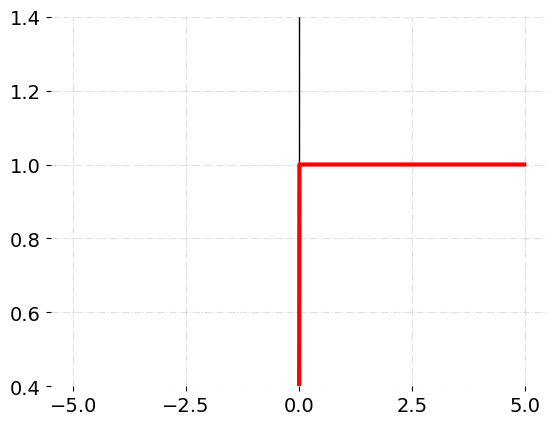

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(-5, 5, 0.01)
# print(x)

def plot(func, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.plot(x, func(x), c='r', lw=3)

binary_step = np.vectorize(lambda x: 1.0 if x > 0 else 0.0)

plot(binary_step, yaxis=(0.4, 1.4))

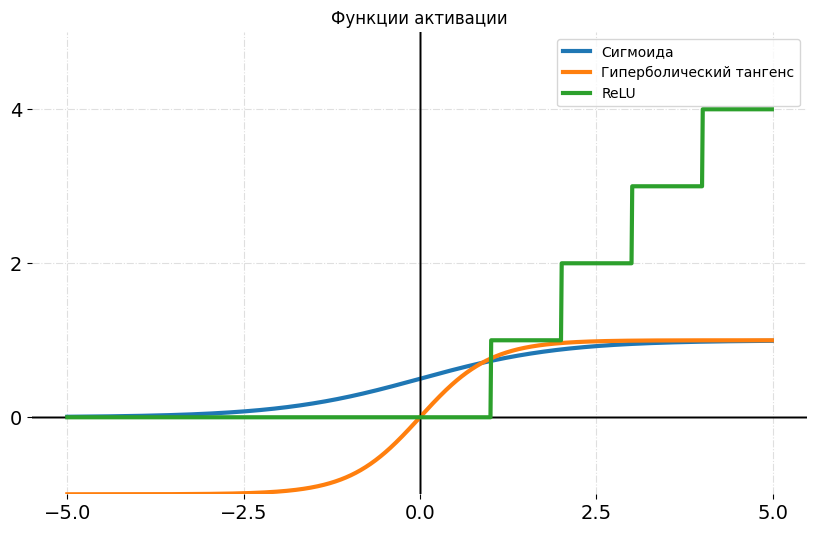

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(-5, 5, 0.01)

def plot(func, label, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(alpha=0.4, ls='-.')
    plt.box(on=None)
    plt.plot(x, func(x), lw=3, label=label)

# Определение функций активации
sigmoid = np.vectorize(lambda x: 1 / (1 + np.exp(-x)))
tanh = np.vectorize(lambda x: np.tanh(x))
relu = np.vectorize(lambda x: max(0, x))

# Визуализация
plt.figure(figsize=(10, 6))
plot(sigmoid, 'Сигмоида', yaxis=(0, 1))
plot(tanh, 'Гиперболический тангенс', yaxis=(-1, 1))
plot(relu, 'ReLU', yaxis=(-1, 5))
plt.legend()
plt.title('Функции активации')
plt.show()


In [ ]:
from numpy import exp, array, random, dot

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1
# print(synaptic_weights)

for iteration in range(10000):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))

print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

[0.99993704]


Код реализует нейрон, который вычисляет взвешенную сумму входного вектора.

In [ ]:
import numpy as np

class Neuron:
    def __init__ (self, w):
        self.w = w

    def y(self, x):
        s = np.dot(self.w, x)
        return s

# Задаем входный вектор
Xi = np.array([1, 0, 0, 1])

# Задаем вектор весов
Wi = np.array([5, 4, 1, 1])
n = Neuron(Wi)
print('s = ', n.y(Xi))

s =  6


In [ ]:
import numpy as np

class Neuron:
    def __init__ (self, w):
        self.w = w

    def onestep(self, x):  # Функция активации
        if x >= 0:
            return 1
        else:
            return 0

    def y(self, x):
        s = np.dot(self.w, x)   # s = np.dot(Wi, Xi) = 5*1 + 4*0 + 1*0 + 1*1 = 6

        return s


bias = 5

Xi = np.array([1, 0, 0, 1])
Wi = np.array([5, 4, 1, 1])

n = Neuron(Wi)
S = n.y(Xi) - bias

print(S)
print(n.onestep(S))   # Y = n.onestep(S) = onestep(1) = 1

1
1


In [ ]:
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами и математическими операциями

class Neuron:
    def __init__(self, w):
        self.w = w  # Инициализируем объект нейрона с вектором весов w

    def onestep(self, x):  # Функция активации, которая принимает входное значение x
        if x >= 0:  # Проверяем, больше ли x или равно нулю
            return 1  # Если да, возвращаем 1 (нейрон сработал)
        else:
            return 0  # Если нет, возвращаем 0 (нейрон не сработал)

    def у(self, x):  # Метод для вычисления взвешенной суммы входов
        s = np.dot(self.w, x)  # Вычисляем скалярное произведение векторов весов и входного вектора
        return s  # Возвращаем взвешенную сумму

bias = 5  # Устанавливаем порог срабатывания нейрона

# Задаем входной вектор
Xi = np.array([1, 0, 0, 1])  # Входной вектор, представляющий значения входов нейрона
# Задаем вектор весов
Wi = np.array([5, 4, 1, 1])  # Вектор весов, который будет применяться к входам

n = Neuron(Wi)  # Создаем экземпляр нейрона с заданными весами
S = n.у(Xi) - bias  # Вычисляем взвешенную сумму входов и вычитаем порог (bias)

print('S =', S)  # Выводим взвешенную сумму S
print('Y =', n.onestep(S))  # Применяем функцию активации к S и выводим результат Y


S = 1
Y = 1


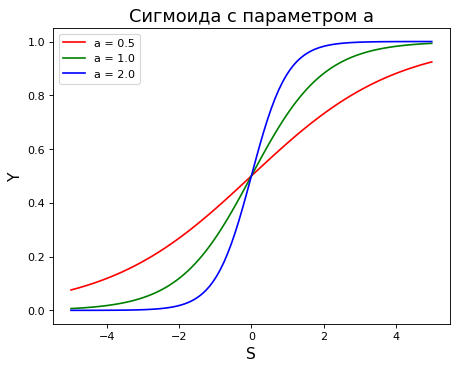

In [ ]:
#@title Сигмоида с параметром a
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)

def sigmoid(alpha):
    return 1 / ( 1 + np.exp(-alpha * x) )

dpi = 80
fig, ax = plt.subplots(dpi = dpi, figsize=(512 / dpi, 384 / dpi))
ax.set_title("Сигмоида с параметром a", fontsize=16)
ax.set_xlabel("S", fontsize=14)
ax.set_ylabel("Y", fontsize=14)

plt.plot(x, sigmoid(0.5), 'r-')
plt.plot(x, sigmoid(1.0), 'g-')
plt.plot(x, sigmoid(2.0), 'b-')

plt.legend(['a = 0.5', 'a = 1.0', 'a = 2.0'], loc = 'upper left')
plt.show()

In [ ]:
import numpy as np
x = np.linspace(-5, 5, 100)
print(x)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [ ]:
import numpy
import matplotlib.pyplot as plt

s = numpy.linspace(-1, 1, 21)
print(s)

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [ ]:
import numpy as np

class Neuron:

    def __init__ (self, w):
        self.w = w

    def y(self, x):
        s = np.dot(self.w, x)
        return s

Xi = np.array([2, 3])
Wi = np.array([1, 1])

n = Neuron(Wi)
print(n.y(Xi))

5


In [ ]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result = np.dot(A, B)
print(result)

[[19 22]
 [43 50]]


In [ ]:
import numpy as np

# Входные данные для обучения
training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = np.array([[0], [1], [1], [0]])

# Установка начального значения генератора случайных чисел
np.random.seed(1)

# Инициализация весов
synaptic_weights = 2 * np.random.random((3, 1)) - 1

# Обучение нейронной сети
for iteration in range(10000):  # Используем range вместо xrange
    # Прямое распространение
    output = 1 / (1 + np.exp(-(np.dot(training_set_inputs, synaptic_weights))))

    # Обновление весов
    synaptic_weights += np.dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))

# Прогноз для нового входа
print(1 / (1 + np.exp(-(np.dot(np.array([1, 0, 0]), synaptic_weights)))))


[0.99993704]


In [ ]:
import numpy as np

# Создаем двумерный массив (матрицу)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

print("Исходная матрица:")
print(matrix)

# Транспонируем матрицу
transposed_matrix = matrix.T

print("\nТранспонированная матрица:")
print(transposed_matrix)


Исходная матрица:
[[1 2 3]
 [4 5 6]]

Транспонированная матрица:
[[1 4]
 [2 5]
 [3 6]]


In [ ]:
import numpy as np

# Создаем одномерный массив (вектор)
vector = np.array([1, 2, 3])

print("Исходный вектор:")
print(vector)

# Транспонируем вектор
transposed_vector = vector.T  # В случае одномерного массива, .T не изменит его форму

print("\nТранспонированный вектор:")
print(transposed_vector)  # Он останется таким же


Исходный вектор:
[1 2 3]

Транспонированный вектор:
[1 2 3]


In [ ]:
import numpy as np

# Входные данные (4 примера, 3 признака)
X = np.array([[0, 0, 1],
              [1, 1, 1],
              [1, 0, 1],
              [0, 1, 1]])

# Выходные данные (4 примера, 1 выход)
y = np.array([[0, 1, 1, 0]]).T  # Транспонируем, чтобы получить форму (4, 1)

print("Входные данные:")
print(X)
print("\nВыходные данные:")
print(y)

print("\n")

Входные данные:
[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]

Выходные данные:
[[0]
 [1]
 [1]
 [0]]


In [ ]:
from numpy import exp, array, random, dot
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T
random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1

for iteration in range(10000):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))
print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

[0.99993704]
